In [188]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [189]:
from sklearn.datasets import fetch_openml

shuttle_data = fetch_openml(name='shuttle', version=1, as_frame=True)

print("Shape of data:", shuttle_data['data'].shape)
print("Shape of target:", shuttle_data['target'].shape)

c:\Users\raidb\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Shape of data: (58000, 9)
Shape of target: (58000,)


c:\Users\raidb\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


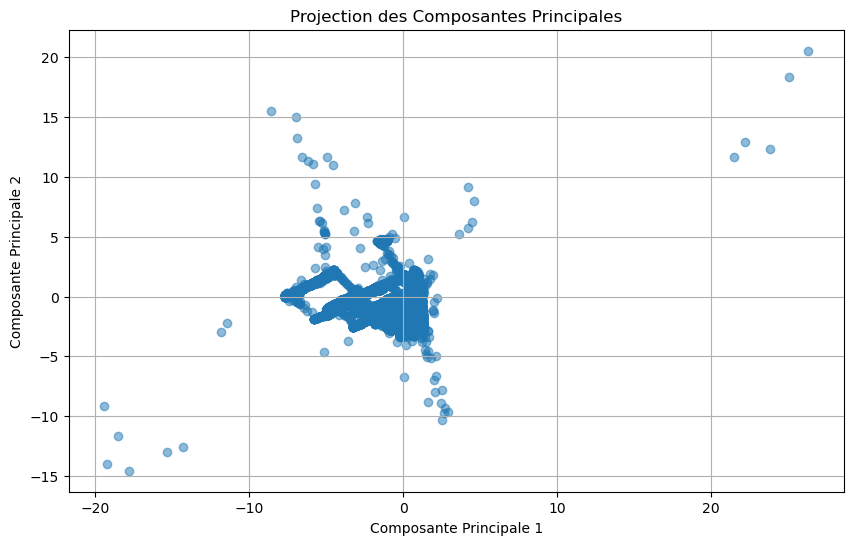

In [190]:
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt

# Charger les données
shuttle_data = fetch_openml(name='shuttle', version=1, as_frame=True)

# Séparer les données et les étiquettes
X = shuttle_data['data']
y = shuttle_data['target']

# Standardiser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Appliquer l'ACP
pca = PCA(n_components=2)  # Réduire à 2 composantes principales pour la visualisation
principal_components = pca.fit_transform(X_scaled)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Visualiser les projections des composantes principales
plt.figure(figsize=(10, 6))
plt.scatter(principal_df['PC1'], principal_df['PC2'], alpha=0.5)
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.title('Projection des Composantes Principales')
plt.grid(True)
plt.show()

In [191]:
import numpy as np

inertie_cumulee = np.cumsum(pca.explained_variance_ratio_)
print("Inertie cumulée des trois premières composantes principales :", inertie_cumulee)

Inertie cumulée des trois premières composantes principales : [0.34653448 0.52486583]


In [192]:
from sklearn.cluster import KMeans

# Nombre de clusters souhaité
n_clusters = 3

# Instancier l'algorithme KMeans avec le nombre de clusters
kmeans = KMeans(n_clusters=n_clusters, n_init=10)

# Entraîner le modèle KMeans sur les données
kmeans.fit(X)  # X est votre jeu de données initial

# Obtenir les labels des clusters pour chaque échantillon
labels = kmeans.labels_

# Afficher les labels des clusters pour chaque échantillon
print("Labels des clusters :", labels)

Labels des clusters : [0 0 0 ... 0 0 0]


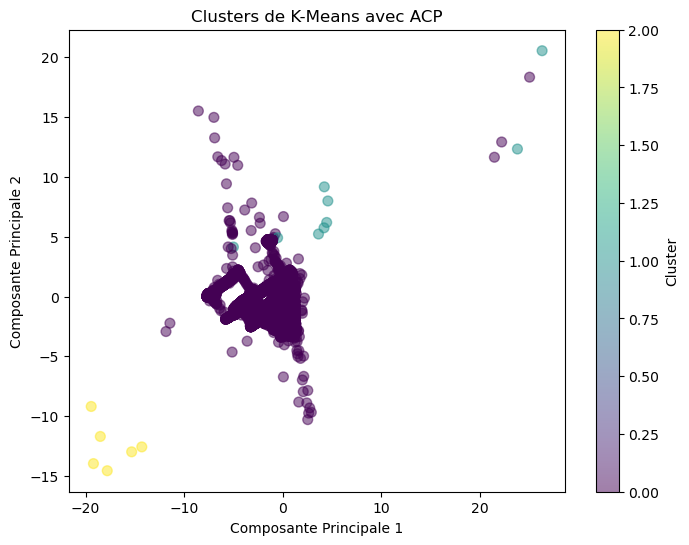

In [193]:
import matplotlib.pyplot as plt

# Visualisation des clusters sur les deux premières composantes principales
plt.figure(figsize=(8, 6))
plt.scatter(principal_df['PC1'], principal_df['PC2'], c=labels, cmap='viridis', s=50, alpha=0.5)
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.title('Clusters de K-Means avec ACP')
plt.colorbar(label='Cluster')
plt.show()

In [194]:
from sklearn.cluster import KMeans

# Instancier l'algorithme KMeans avec le nombre de clusters souhaité
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, n_init=10)

# Appliquer KMeans sur les composantes principales
kmeans.fit(principal_df)

# Obtenir les labels des clusters pour chaque échantillon
labels = kmeans.labels_

# Afficher les labels des clusters pour chaque échantillon
print("Labels des clusters :", labels)

Labels des clusters : [2 1 2 ... 1 0 2]


c:\Users\raidb\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


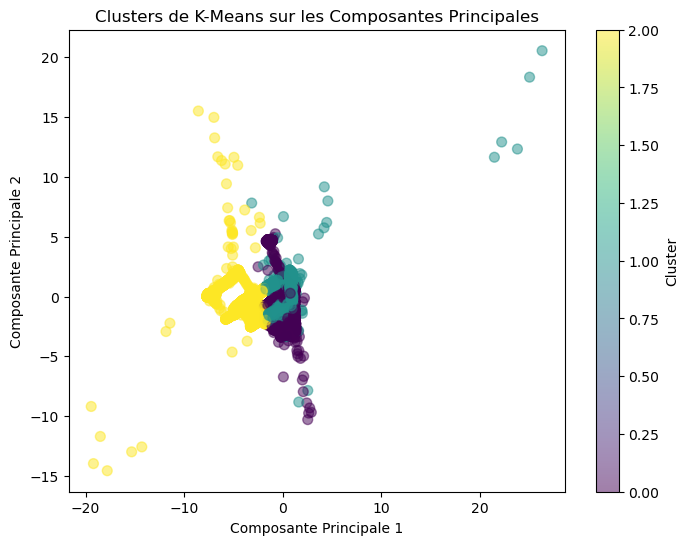

In [195]:
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Charger les données
shuttle_data = fetch_openml(name='shuttle', version=1, as_frame=True)
X = shuttle_data['data']

# Standardiser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Appliquer l'ACP
pca = PCA(n_components=5)  # Choisissez le nombre de composantes principales
principal_components = pca.fit_transform(X_scaled)

# Appliquer K-Means sur les composantes principales
kmeans = KMeans(n_clusters=3, n_init=10)
kmeans.fit(principal_components)
labels = kmeans.labels_

# Visualiser les clusters sur les composantes principales
plt.figure(figsize=(8, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=labels, cmap='viridis', s=50, alpha=0.5)
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.title('Clusters de K-Means sur les Composantes Principales')
plt.colorbar(label='Cluster')
plt.show()


In [196]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2

# Appliquer MinMaxScaler pour mettre à l'échelle les caractéristiques dans une plage non négative
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Sélection des caractéristiques avec SelectKBest et le test du chi carré
selector = SelectKBest(chi2, k=2)  # Vous pouvez ajuster k en fonction de vos besoins
X_new = selector.fit_transform(X_scaled, y)

# Affichage des indices des caractéristiques sélectionnées
print("Indices des caractéristiques sélectionnées :", selector.get_support(indices=True))

X_new = selector.fit_transform(X_scaled, y)

# Obtenez les indices des caractéristiques sélectionnées
indices_caracteristiques_selectionnees = selector.get_support(indices=True)

# Créez un nouveau DataFrame avec seulement les caractéristiques sélectionnées
nouveau_X = X.iloc[:, indices_caracteristiques_selectionnees]

# Afficher la forme du nouveau jeu de données pour vérifier
print("Shape of new dataset:", nouveau_X.shape)

Indices des caractéristiques sélectionnées : [0 6]
Shape of new dataset: (58000, 2)


c:\Users\raidb\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


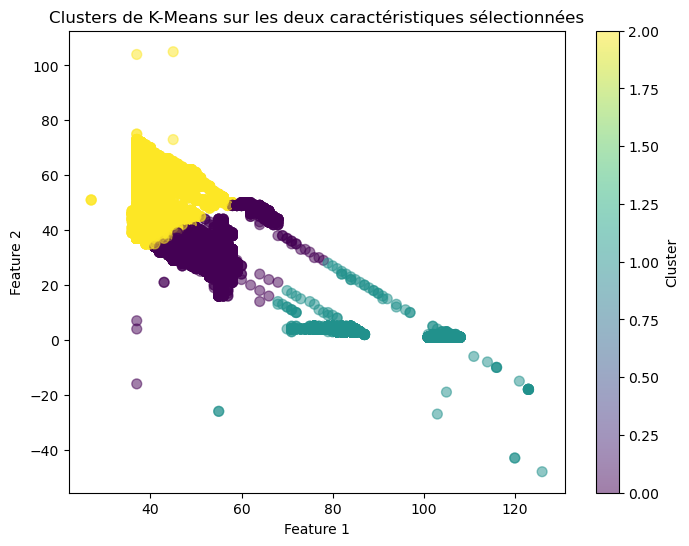

In [197]:
n_clusters = 3

# Instancier l'algorithme KMeans avec le nombre de clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Entraîner le modèle KMeans sur le nouveau jeu de données
kmeans.fit(nouveau_X)

# Obtenir les labels des clusters pour chaque échantillon
labels = kmeans.labels_

# Visualiser les clusters sur les deux caractéristiques sélectionnées
plt.figure(figsize=(8, 6))
plt.scatter(nouveau_X.iloc[:, 0], nouveau_X.iloc[:, 1], c=labels, cmap='viridis', s=50, alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Clusters de K-Means sur les deux caractéristiques sélectionnées')
plt.colorbar(label='Cluster')
plt.show()

c:\Users\raidb\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\raidb\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\raidb\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\raidb\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

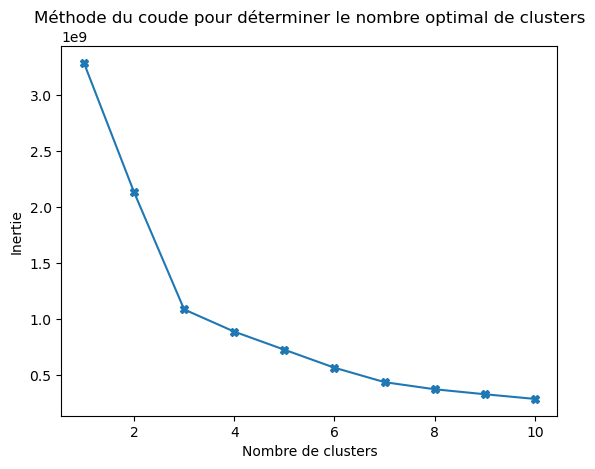

In [198]:
# Liste pour stocker les valeurs d'inertie
inertia = []

# Nombre de clusters à tester
k_range = range(1, 11)

# Calcul de l'inertie pour différents nombres de clusters
for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Tracer la courbe d'inertie
plt.plot(k_range, inertia, marker='X')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.title('Méthode du coude pour déterminer le nombre optimal de clusters')
plt.show()

c:\Users\raidb\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\raidb\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\raidb\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\raidb\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

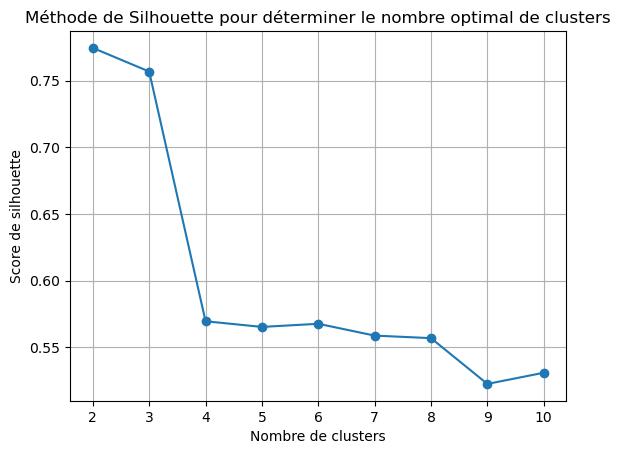

In [225]:
from sklearn.metrics import silhouette_score

# Liste pour stocker les scores de silhouette
silhouette_scores = []

# Nombre de clusters à tester
cluster_range = range(2, 11)

for n_clusters in cluster_range:
    # Instancier et entraîner le modèle KMeans
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    
    # Calculer le score de silhouette
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Tracer la courbe des scores de silhouette
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('Score de silhouette')
plt.title('Méthode de Silhouette pour déterminer le nombre optimal de clusters')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()

In [200]:
# Charger le jeu de données
url = "./AirQualityDataset.csv"
data = pd.read_csv(url, sep=',')

print(data.columns)

Index(['Country', 'City', 'AQI Value', 'AQI Category', 'CO AQI Value',
       'CO AQI Category', 'Ozone AQI Value', 'Ozone AQI Category',
       'NO2 AQI Value', 'NO2 AQI Category', 'PM2.5 AQI Value',
       'PM2.5 AQI Category', 'lat', 'lng'],
      dtype='object')


In [201]:
data.shape

(16695, 14)

In [202]:
x = data['AQI Value']

y = data['Ozone AQI Value']

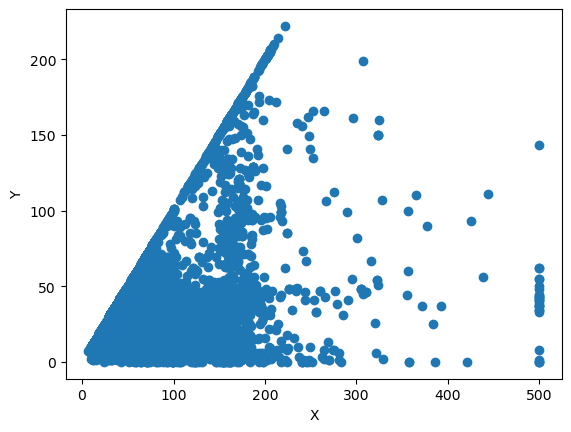

In [203]:
# Creating a scatter plot to visualize the generated data
# - x: Independent variable values (abscissa)
# - y: Dependent variable values (ordinate)
plt.scatter(x, y)

# Adding labels to the axes
plt.xlabel('X')
plt.ylabel('Y')

# Displaying the plot
plt.show()

In [204]:
import numpy as np

# Convertir la série pandas en un tableau numpy
y_array = y.to_numpy()  # ou bien y.values

# Appliquer reshape sur le tableau numpy
y= y_array.reshape(y.shape[0], 1)

# Afficher la nouvelle forme de y après le remodelage
print(y.shape)


(16695, 1)


In [205]:
x_array = x.to_numpy()
x= x_array.reshape(x.shape[0], 1)
print(x.shape)

(16695, 1)


In [206]:
X = np.hstack((x, np.ones(x.shape)))
print(X.shape)

(16695, 2)


In [207]:
np.random.seed(0)  # Set the seed for reproducibility

# Generate a random vector theta with shape (2, 1) using a standard normal distribution
# The shape is (2, 1) indicating it's a column vector with 2 rows and 1 column
theta = np.random.randn(2, 1)

# Display the generated random vector theta
theta

array([[1.76405235],
       [0.40015721]])

In [208]:
def Linear_model(X, theta):
    return X.dot(theta)

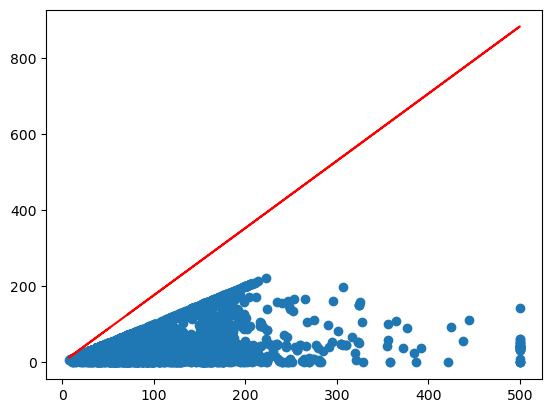

In [224]:
plt.scatter(x, y)
plt.plot(x, Linear_model(X, theta), c='red')

In [210]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((Linear_model(X, theta) - y)**2)

In [211]:
cost_function(X, y, theta)

5761.820390686171

In [212]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(Linear_model(X, theta) - y)

In [214]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    """
    Perform gradient descent to minimize the cost function.

    Parameters:
    - X: Feature matrix (including the intercept term)
    - y: Target values
    - theta: Initial model parameters
    - learning_rate: Learning rate for gradient descent
    - n_iterations: Number of iterations for gradient descent

    Returns:
    - Optimized model parameters theta
    - Array of cost history (evolution of cost function over iterations)
    """
    cost_history = np.zeros(n_iterations)  # Create an array to store the evolution of the cost function
    
    for i in range(n_iterations):
        # Update theta using gradient descent formula
        theta = theta - learning_rate * grad(X, y, theta)
        
        # Calculate the cost function value and store it in the cost_history array
        cost_history[i] = cost_function(X, y, theta)
        
    return theta, cost_history

In [215]:
n_iterations = 100
learning_rate = 0.0001


theta_final, cost_history = gradient_descent(X, y, theta, learning_rate, n_iterations)

In [216]:
theta_final

array([[0.39407713],
       [0.45036017]])

In [217]:
cost_history

array([1250.82613539,  465.02600969,  328.13936237,  304.29077118,
        300.13294414,  299.40516736,  299.27489143,  299.24869791,
        299.24063534,  299.23573133,  299.23137776,  299.22712028,
        299.22287978,  299.21864245,  299.2144059 ,  299.2101697 ,
        299.20593379,  299.20169816,  299.19746279,  299.1932277 ,
        299.18899287,  299.18475832,  299.18052403,  299.17629002,
        299.17205627,  299.16782279,  299.16358959,  299.15935665,
        299.15512399,  299.15089159,  299.14665946,  299.1424276 ,
        299.13819602,  299.1339647 ,  299.12973365,  299.12550287,
        299.12127236,  299.11704212,  299.11281216,  299.10858246,
        299.10435303,  299.10012386,  299.09589497,  299.09166635,
        299.087438  ,  299.08320992,  299.0789821 ,  299.07475456,
        299.07052729,  299.06630028,  299.06207355,  299.05784708,
        299.05362088,  299.04939496,  299.0451693 ,  299.04094391,
        299.03671879,  299.03249394,  299.02826936,  299.02404

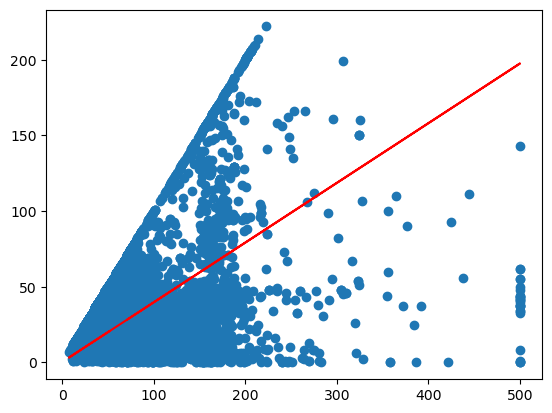

In [218]:
# Create predictions using the trained model and final parameters
predictions = Linear_model(X, theta_final)

# Plot the original dataset (in blue) and the predictions (in red)
plt.scatter(x, y)  # Scatter plot of the original dataset
plt.plot(x, predictions, c='r')  # Plot predictions against the x values

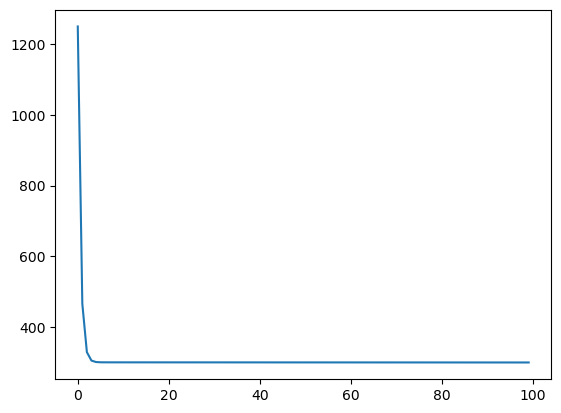

In [219]:
plt.plot(range(n_iterations), cost_history)

In [222]:
def coef_determination(y, pred):
    """
    Calculate the coefficient of determination (R^2 score).

    Parameters:
    - y: Array of true values
    - pred: Array of predicted values

    Returns:
    - Coefficient of determination (R^2 score)
    """
    u = ((y - pred)**2).sum()  # Sum of squared residuals (unexplained variance)
    v = ((y - y.mean())**2).sum()  # Total sum of squares (total variance)
    return 1 - u/v  # Coefficient of determination formula

In [223]:
coef_determination(y, predictions)

-0.14590800693218609